In [1]:
# 大作业，分析CDnow数据

In [2]:
# 数据集一共有四个字段 user_id  购买日期 购买数量和购买金额

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from datetime import datetime

In [7]:
# 加载数据集

In [8]:
columns = ['user_id','buy_time','buy_num','buy_money']

In [9]:
df = pd.read_table('D:\桌面\CDNOW.txt'，names = columns,sep = '\s+')

SyntaxError: invalid character in identifier (<ipython-input-9-bdaabcfae61f>, line 1)

In [14]:
df = pd.read_table('G:\CDNOW.txt', names = columns, sep = '\s+')

In [15]:
# 初步了解数据集

NameError: name '初步了解数据集' is not defined

In [16]:
df.head()

,user_id,buy_time,buy_num,buy_money
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [17]:
df.describe()

,user_id,buy_time,buy_num,buy_money
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [18]:
# 用户平均购买 2.4 个商品，标准差为2.3  中位数为2   75分数为 3 个商品

In [19]:
# 单个用户购买的最大数目为 99

In [20]:
#时间列转换

In [29]:
df['buy_date'] = pd.to_datetime(df.buy_time,format = '%Y%m%d')

In [31]:
df['buy_date']

0       1997-01-01
1       1997-01-12
2       1997-01-12
3       1997-01-02
4       1997-03-30
5       1997-04-02
6       1997-11-15
7       1997-11-25
8       1998-05-28
9       1997-01-01
10      1997-01-18
11      1997-08-02
12      1997-12-12
13      1997-01-01
14      1997-01-14
15      1997-02-04
16      1997-04-11
17      1997-05-31
18      1997-06-16
19      1997-07-22
20      1997-09-15
21      1997-12-08
22      1997-12-12
23      1998-01-03
24      1997-01-01
25      1997-01-01
26      1997-10-11
27      1998-03-22
28      1997-01-01
29      1997-02-13
           ...    
69629   1997-09-27
69630   1998-01-03
69631   1998-06-07
69632   1997-03-25
69633   1997-03-25
69634   1997-05-18
69635   1997-06-24
69636   1998-02-25
69637   1997-03-25
69638   1997-05-18
69639   1997-06-27
69640   1997-03-25
69641   1997-03-25
69642   1998-01-28
69643   1998-05-29
69644   1997-03-25
69645   1997-03-25
69646   1997-10-04
69647   1997-03-25
69648   1997-05-21
69649   1997-11-30
69650   1997

In [23]:
df.head()

,user_id,buy_time,buy_num,buy_money
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [24]:
# 数据探索

In [25]:
# 我们将数据可以转换为每个用户 使用groupby

In [26]:
user_grouped = df.groupby('user_id').sum()

In [27]:
user_grouped

,buy_num,buy_money
user_id,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61
6,1,20.99
7,18,264.67
8,18,197.66
9,6,95.85


In [32]:
df['month'] = df.buy_date.astype('datetime64[M]')

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [datetime64[M]]

In [37]:
df['month'] = df.buy_date.values.astype('datetime64[M]')

In [38]:
df

,user_id,buy_time,buy_num,buy_money,buy_date,month
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-12,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-12,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-02,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-30,1997-03-01
5,3,1997-04-02,2,19.54,1997-04-02,1997-04-01
6,3,1997-11-15,5,57.45,1997-11-15,1997-11-01
7,3,1997-11-25,4,20.96,1997-11-25,1997-11-01
8,3,1998-05-28,1,16.99,1998-05-28,1998-05-01
9,4,1997-01-01,2,29.33,1997-01-01,1997-01-01


In [39]:
df.groupby('month').buy_money.sum().plot()

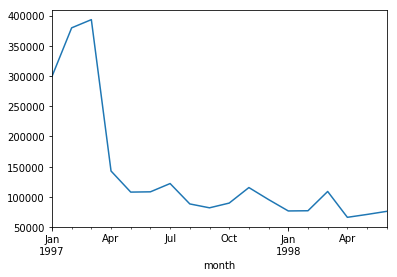

In [40]:
plt.show()

In [41]:
# 探索是否有丽群点

In [42]:
# 绘制每笔订单的散点图

In [43]:
df.plot.scatter(x = 'buy_money',y = 'buy_num')

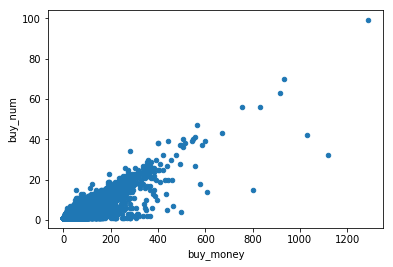

In [44]:
plt.show()

In [45]:
# 绘制每个 user 的订单的散点图

In [46]:
df.groupby('user_id').sum().plot.scatter(x = 'buy_money',y = 'buy_num')

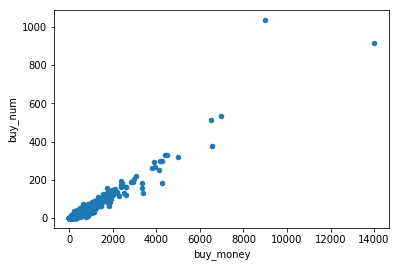

In [47]:
plt.show()

In [48]:
# 分析每个用户的消费行为

In [49]:
plt.figure(figsize=(12,4))

<Figure size 864x288 with 0 Axes>

In [50]:
plt.subplot(121)

In [51]:
df.buy_money.hist(bins = 30)

In [52]:
plt.subplot(122)

In [53]:
df.groupby('user_id').buy_num.sum().hist(bins = 30)

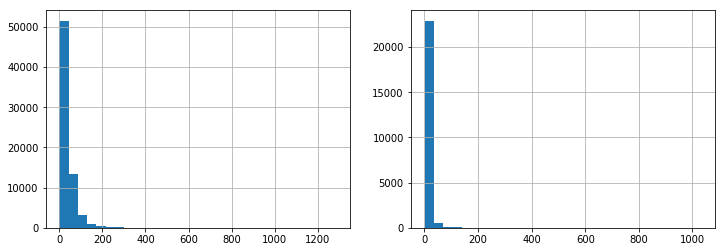

In [54]:
plt.show()

In [55]:
# 从上图可以看到，大部分顾客的消费能力一般

In [56]:
# 观察消费的时间节点

In [58]:
df.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [59]:
#  用户初次消费月份，主要集中在前三个月

In [60]:
# 下面来观察最好消费月份

In [61]:
df.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [62]:
# 也主要分布在前三个月

In [63]:
# 分析复购率和回购率

In [64]:
# 将数据进行透视

In [68]:
pivoted_counts  = df.pivot_table(index='user_id',columns='month',values = 'buy_time',aggfunc = 'count').fillna(0)

In [69]:
columns_month = df.month.sort_values().astype('str').unique()

In [70]:
pivoted_counts.columns = columns_month

In [71]:
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [72]:
pivoted_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
df

,user_id,buy_time,buy_num,buy_money,buy_date,month
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-12,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-12,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-02,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-30,1997-03-01
5,3,1997-04-02,2,19.54,1997-04-02,1997-04-01
6,3,1997-11-15,5,57.45,1997-11-15,1997-11-01
7,3,1997-11-25,4,20.96,1997-11-25,1997-11-01
8,3,1998-05-28,1,16.99,1998-05-28,1998-05-01
9,4,1997-01-01,2,29.33,1997-01-01,1997-01-01


In [74]:
# 复购率，指某时间窗口内消费两次及以上的比例

In [75]:
# 时间窗口设置为 1 个月，消费两次以上 1  消费一次 0  没有消费 NaN

In [76]:
pivoted_counts_transf  = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)

In [77]:
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [79]:
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# applymap函数是针对 DF 的每个数据，apply函数仅针对 DF 中的一维向量进行运算

In [81]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize = (10,4))


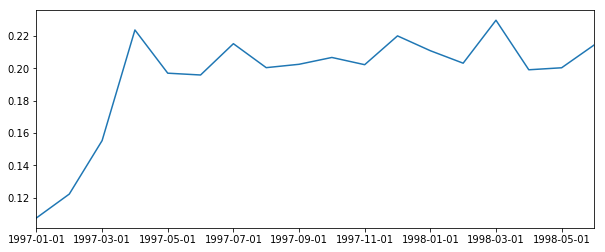

In [82]:
plt.show()

In [86]:
# 上图为复购率曲线

In [84]:
# 用 sum() count() 或者单独的 mean() 函数既可计算回购率，可以忽略 NaN  count 会把 0 统计进去， 0 代表仅仅 消费一次

In [87]:
# 起初，新用户的大量加入，早期新用户的回购率不高，随着时间的推移，出现比较多的忠诚的顾客，复购率上升，约在 20%

In [88]:
# 回购率

In [89]:
# 回购率指在某一个时间窗口内消费，在下一个时间窗口任然消费的顾客占比

In [90]:
pivoted_amount = df.pivot_table(index = 'user_id', columns = 'month',
                               values = 'buy_money', aggfunc = 'mean').fillna(0)

In [91]:
columns_month = df.month.sort_values().astype('str').unique()


In [92]:
pivoted_amount.columns = columns_month


In [93]:
pivoted_amount.head()


,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [94]:
# 将消费金额进行了数据透视，这里简单使用了某顾客一月内消费的平均值。

In [95]:
# 再次使用applymap和lambda，某月内有消费记录记为1，没有则为0.

In [96]:
pivoted_purchase = pivoted_amount.applymap(lambda x : 1 if x > 0 else 0)

In [97]:
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [98]:
# 用户分成 可以将用户分为四个层次
# 新用户，活跃用户，不活页用户，回流用户
# 新用户第一次消费
# 活跃用户为老用户，指在某一个时间窗口内有过消费
# 不活跃用户指在某一个时间窗口内没有消费过的老客
# 回流用户指在上一个窗口内没有消费，在当前窗口内有消费。

In [99]:
# 举个例子，A 1月成为新用户，2月又消费，活跃用户，3月不消费，不活跃用户，4月消费，回流用户
# 5月又消费，活跃用户

In [103]:
# 探究高质量用户

In [105]:
user_amount = df.groupby('user_id').buy_money.sum().sort_values().reset_index()


In [107]:
user_amount['amount_cumsum'] = user_amount.buy_money.cumsum()


In [108]:
user_amount.tail()

,user_id,buy_money,amount_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [109]:
# 按照消费金额排序，cumsum是累加函数，逐行计算累计的金额，最后的 2500315.63 是所有人的消费总金额

In [110]:
amount_total = user_amount.amount_cumsum.max()

In [111]:
user_amount['prop'] = user_amount.apply(lambda x: x.amount_cumsum/amount_total, axis = 1)


In [112]:
user_amount.tail()


,user_id,buy_money,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


In [113]:
# 上面方框是转换为百分比

In [114]:
user_amount.prop.plot()

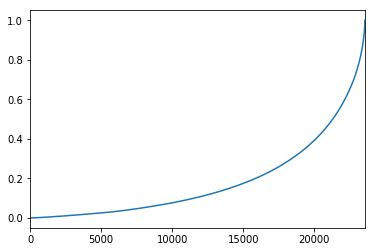

In [115]:
plt.show()

In [116]:
# 可以明显看出来，前20000个用户贡献了 40% 的消费金额， 后 4000 名用户贡献了 60% 的消费金额

In [117]:
# 同理，我们可以观察订单数量这个维度

In [119]:
user_counts = df.groupby('user_id').buy_time.count().sort_values().reset_index()


In [121]:
user_counts['counts_cumsum'] = user_counts.buy_time.cumsum()


In [122]:
counts_total = user_counts.counts_cumsum.max()


In [123]:
user_counts['prop'] = user_counts.apply(lambda x: x.counts_cumsum/counts_total, axis = 1)


In [124]:
user_counts.prop.plot()


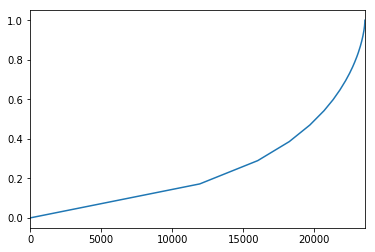

In [125]:
plt.show()


In [126]:
# 前 20000个用户贡献了 45% 的销量，哈哈哈，紧抓高质量用户才是王道呀

In [127]:
# 计算用户的生命周期

In [128]:
# 生命周期定义：第一次消费到最后一次消费之间的时间差为用户的生命周期

In [129]:
user_purchase = df[['user_id','buy_num','buy_money','buy_time']]

In [130]:
order_date_min = user_purchase.groupby('user_id').buy_time.min()

In [131]:
order_date_max = user_purchase.groupby('user_id').buy_time.max()

In [132]:
(order_date_max-order_date_min).head(10)

user_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: buy_time, dtype: timedelta64[ns]

In [133]:
# 计算平均用户生命周期

In [134]:
(order_date_max-order_date_min).mean()

Timedelta('134 days 20:55:36.987696')

In [135]:
# 数据类型是 timedelta 时间，无法直接做直方图，需要先转换为数值
# 转换方法为直接除以 timedelat 函数既可

In [139]:
(( order_date_max-order_date_min) / np.timedelta64(1,'D')).hist()

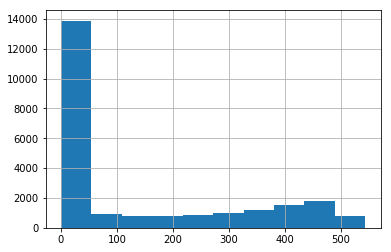

In [140]:
plt.show()

In [141]:
# 可以看见，大部分的用户的生命周期为0 就是只消费了一次的意思，计算消费两次以上的顾客的生命周期

In [142]:
life_time = (order_date_max-order_date_min).reset_index() #转换为dataframe类型


In [143]:
life_time.head()

,user_id,buy_time
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


In [144]:
life_time

,user_id,buy_time
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days
5,6,0 days
6,7,445 days
7,8,452 days
8,9,523 days
9,10,0 days


In [146]:
life_time['life_time'] = life_time.buy_time/np.timedelta64(1,'D')

In [147]:
life_time.head()

,user_id,buy_time,life_time
0,1,0 days,0.0
1,2,0 days,0.0
2,3,511 days,511.0
3,4,345 days,345.0
4,5,367 days,367.0


In [148]:
life_time[life_time.life_time>0].life_time.hist()

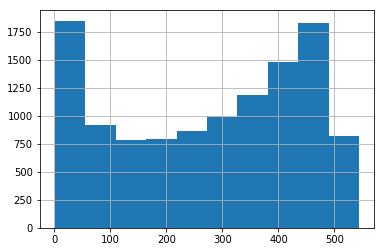

In [149]:
plt.show()

In [150]:
life_time[life_time.life_time>0].life_time.hist(bins = 100)

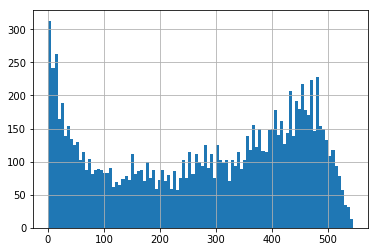

In [151]:
plt.show()

In [152]:
life_time[life_time.life_time>0].life_time.mean()

276.0448072247308

In [153]:
life_time.life_time.mean()

134.8719558761137

In [154]:
# 276 是 去掉 消费一次的
# 134是 没有去掉消费一次的

In [155]:
# 计算留存率

In [156]:
# 留存率指用户第一次消费后，有多少比率进行第二次消费

In [157]:
user_purchase_retention = pd.merge(left = user_purchase, right = order_date_min.reset_index(),
                                   how = 'inner', on = 'user_id',
                                   suffixes = ('', '_min')
                                  )


In [158]:
user_purchase_retention.head()

,user_id,buy_num,buy_money,buy_time,buy_time_min
0,1,1,11.77,1997-01-01,1997-01-01
1,2,1,12.00,1997-01-12,1997-01-12
2,2,5,77.00,1997-01-12,1997-01-12
3,3,2,20.76,1997-01-02,1997-01-02
4,3,2,20.76,1997-03-30,1997-01-02


In [161]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.buy_time-user_purchase_retention.buy_time_min
#将日期转化为时间
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(lambda x: x/np.timedelta64(1,'D')) #日期转换为时间
user_purchase_retention.head()


,user_id,buy_num,buy_money,buy_time,buy_time_min,order_date_diff,date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0


In [162]:
bin = [0,3,7,15,30,60,90,180,365]


In [163]:
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins = bin)


In [164]:
user_purchase_retention.head(10)

,user_id,buy_num,buy_money,buy_time,buy_time_min,order_date_diff,date_diff,date_diff_bin
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0,NaN
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0,NaN
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0,NaN
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0,"(60, 90]"
5,3,2,19.54,1997-04-02,1997-01-02,90 days,90.0,"(60, 90]"
6,3,5,57.45,1997-11-15,1997-01-02,317 days,317.0,"(180, 365]"
7,3,4,20.96,1997-11-25,1997-01-02,327 days,327.0,"(180, 365]"
8,3,1,16.99,1998-05-28,1997-01-02,511 days,511.0,NaN
9,4,2,29.33,1997-01-01,1997-01-01,0 days,0.0,NaN
